# Audi used cars Exploratory Data Analysis(EDA)

Md. Tawhidul Islam Bhuiyan


# Importing required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
df = pd.read_csv("audi.csv")

display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


#### The Feature variables of the given dataset :
**model**: models of the Audi cars
<br>**year**: the year car was made
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: engine size is the volume of fuel and air that can be pushed through a car's cylinders

#### Target Variable:
**price**: the selling price of the car

# check for missing values, data types of the columns


In [3]:
# check for missing values, data types of the columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

In [4]:
def unique_percent_count(data, col):

    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)

    col_count = col_count.reset_index()

    

    col_count = col_count.rename(columns={'index':col, col:'% of cars'})
    col_count['% of cars'] = col_count['% of cars']*100
    

    col_count = col_count.round(2)
    
    return col_count



In [5]:
fuelType_count = unique_percent_count(df, 'fuelType')

display(fuelType_count)

transmission_count = unique_percent_count(df, 'transmission')

display(transmission_count)

model_count = unique_percent_count(df, 'model')

display(model_count.head())

year_count = unique_percent_count(df, 'year')

#display(year_count)

year_count = year_count.sort_values(by='year')

display(year_count.head(5))
display(year_count.tail(5))

 

,fuelType,% of cars
0,Diesel,52.28
1,Petrol,47.46
2,Hybrid,0.26


,transmission,% of cars
0,Manual,40.95
1,Semi-Auto,33.66
2,Automatic,25.38


,model,% of cars
0,A3,18.08
1,Q3,13.28
2,A4,12.95
3,A1,12.63
4,A5,8.27


,year,% of cars
19,1997,0.01
20,1998,0.01
18,2002,0.02
16,2003,0.06
17,2004,0.05


,year,% of cars
1,2016,18.41
2,2017,18.14
4,2018,8.10
0,2019,29.97
5,2020,6.71


In [6]:
def barplot(data, x_col, y_col, color, rotation):
    sns.barplot(x=x_col, y=y_col, data=data, color=color)
    plt.title("Percentage of AUDI Cars for each " + x_col )
    
    #plt.yticks(np.arange(0,21,2))
    plt.xticks(rotation=rotation)


# Function to show the Data Visualization for unique percentage in a column using a barplot

**Creating Subplots to visualize categorical variables**

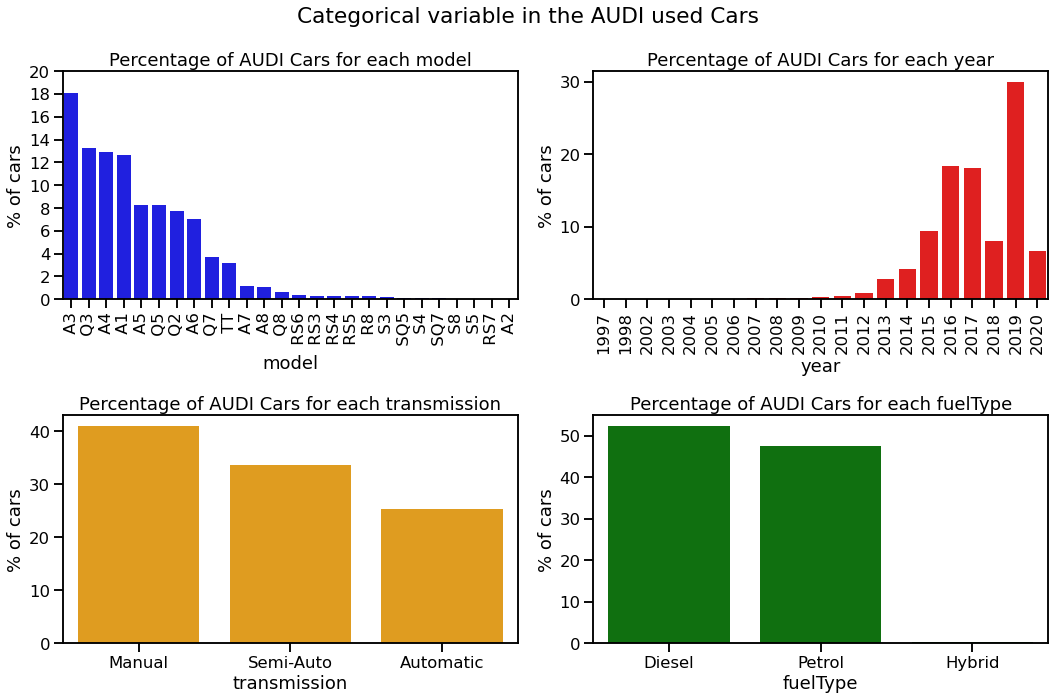

In [7]:
sns.set_context("talk")

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
barplot(model_count, 'model', '% of cars', 'blue', 90)
plt.yticks(np.arange(0,21,2))

plt.subplot(2,2,2)
barplot(year_count, 'year', '% of cars', 'red', 90)



plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', '% of cars', 'orange', 0)




plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', '% of cars', 'green', 0)



plt.suptitle("Categorical variable in the AUDI used Cars")


plt.tight_layout()
#plt.savefig("barplot.png")

plt.savefig("barplot2.jpg")

plt.show()

#  Data Visualization for unique percentage in a column using a Pie-Chart

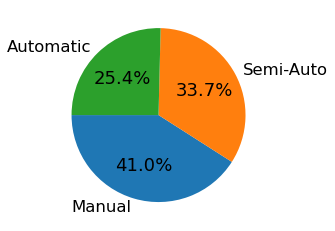

In [8]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

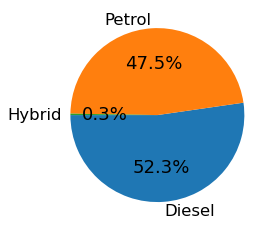

In [9]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

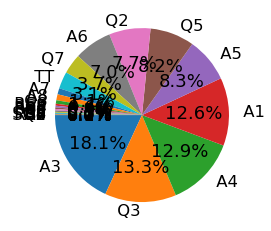

In [10]:
df["model"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

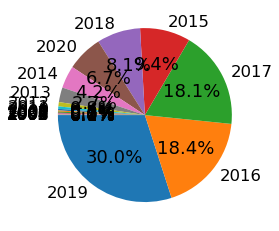

In [11]:
df["year"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

Above visualization, it seems that The bar plot excels at showing discrete data while comparing one data-point between another, while the pie chart is the classic way to show how various parts makes up a whole.
According to the visualization Barplot is better comapare to the pie chart in this case. Because in terms of more than three variables pie chart isn't useful for visualization, when it seems good with the visualization with barplot.

# Scatterplot of the features and target variable 'price'

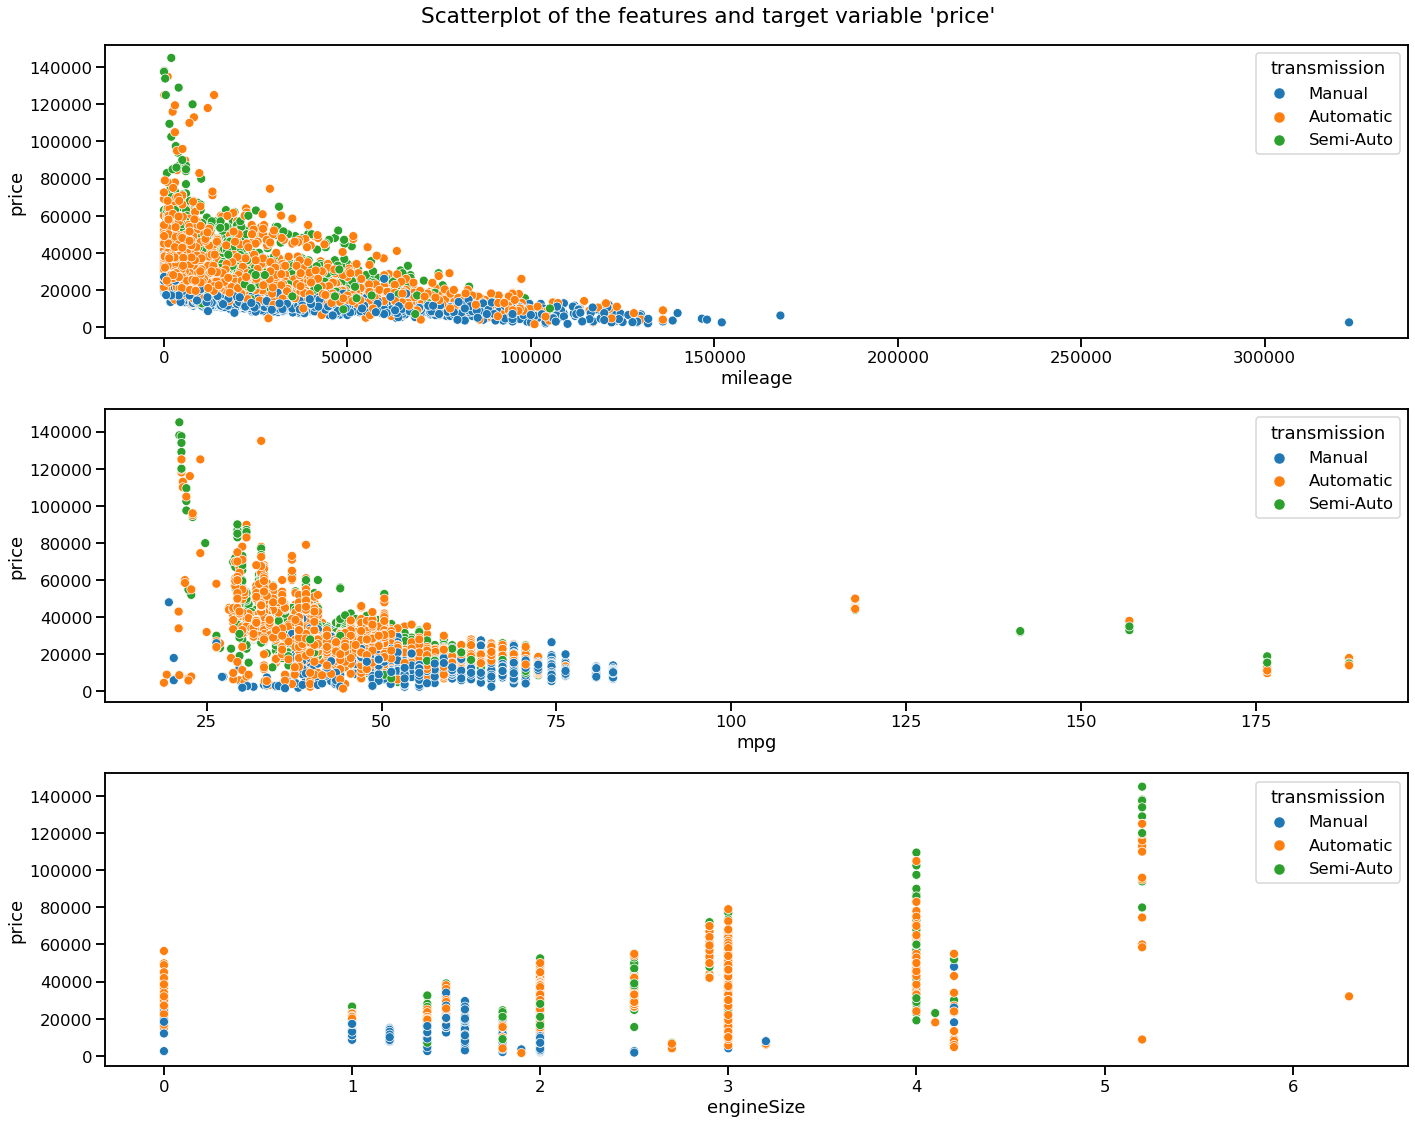

In [12]:
plt.figure(figsize=(20,16))

# mileage vs price
plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')

# mpg vs price
plt.subplot(3,1,2)
sns.scatterplot(x='mpg', y='price', data=df, hue='transmission')

# engineSize vs price
plt.subplot(3,1,3)
sns.scatterplot(x='engineSize', y='price', data=df, hue='transmission')

# # mpg vs enginesize
# plt.subplot(2,2,4)
# sns.scatterplot(x='mpg', y='engineSize', data=df)


plt.suptitle("Scatterplot of the features and target variable 'price'")
plt.tight_layout()
plt.show()

# Scatterplot with the regression line

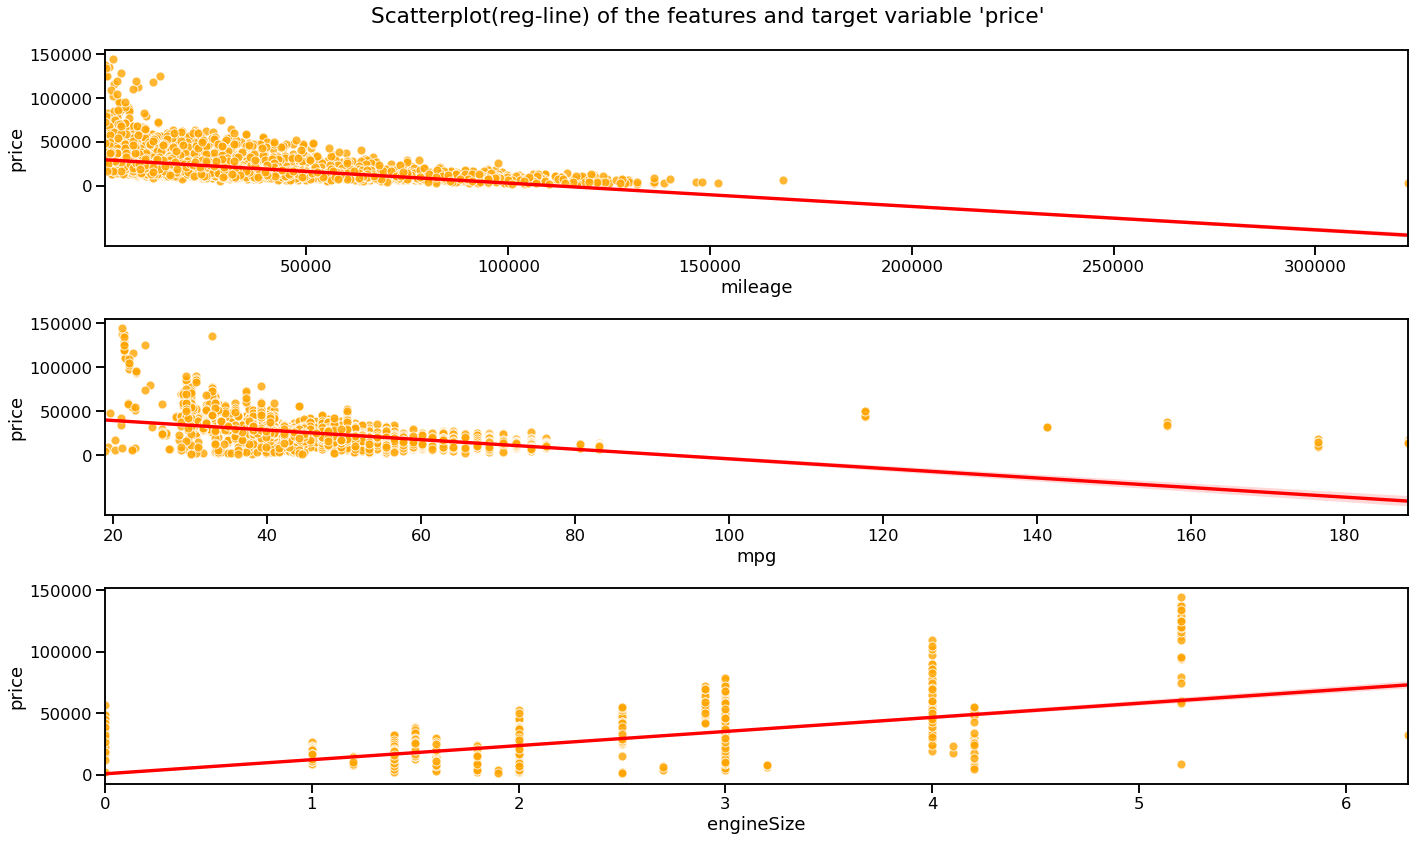

In [13]:
plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor':'white'}, line_kws={'color':'r'})
plt.yticks(np.arange(0,150001,50000))


plt.subplot(3,1,2)
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor':'white'}, line_kws={'color':'r'})
#plt.xticks(np.arange(0,181,20))
plt.yticks(np.arange(0,150001,50000))


plt.subplot(3,1,3)
sns.regplot(x='engineSize', y='price', data=df, 
            scatter_kws={'color':'orange', 'edgecolor':'white'}, line_kws={'color':'r'})


plt.suptitle("Scatterplot(reg-line) of the features and target variable 'price'")
plt.tight_layout()
plt.show()

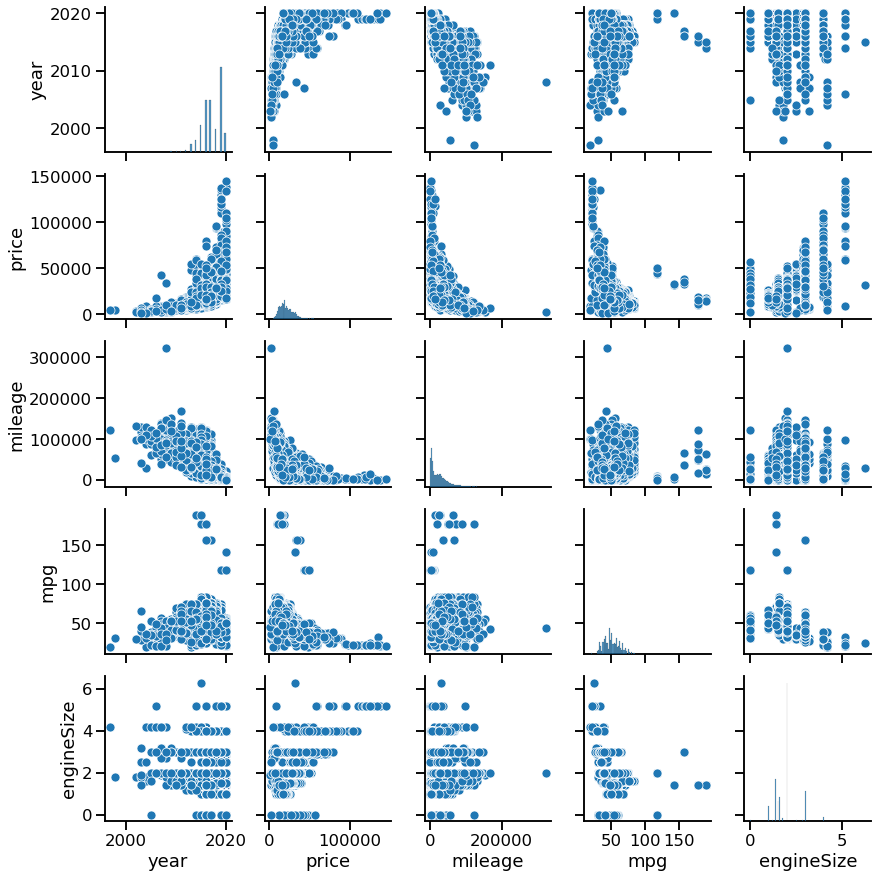

In [15]:
sns.pairplot(df) 
plt.show()

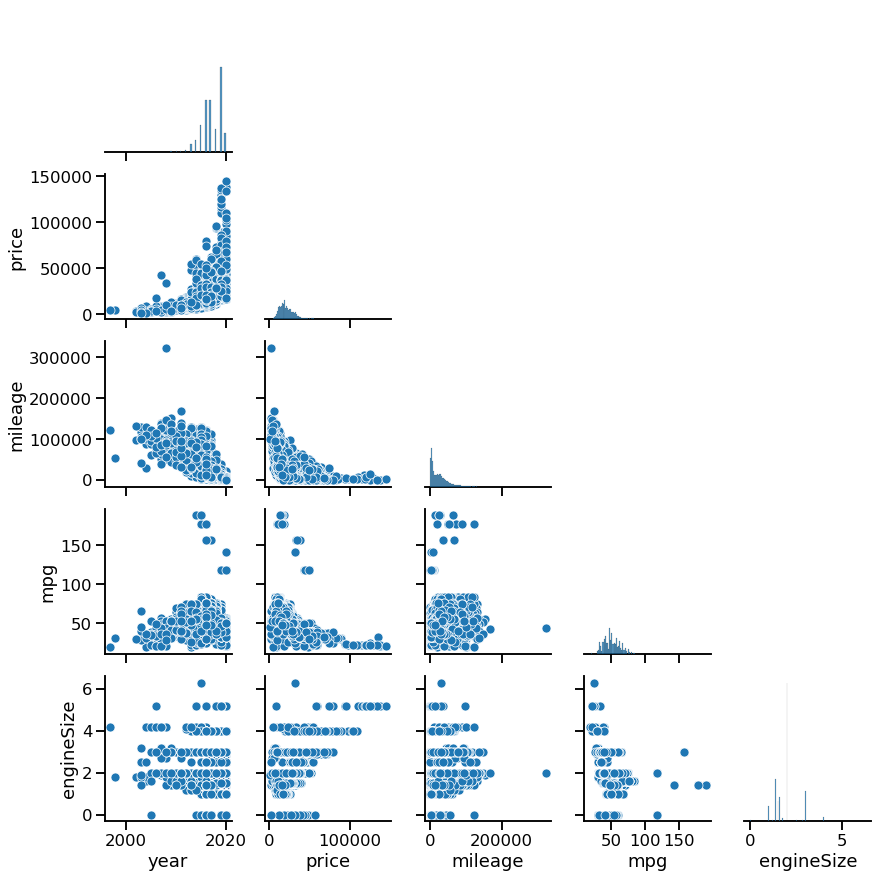

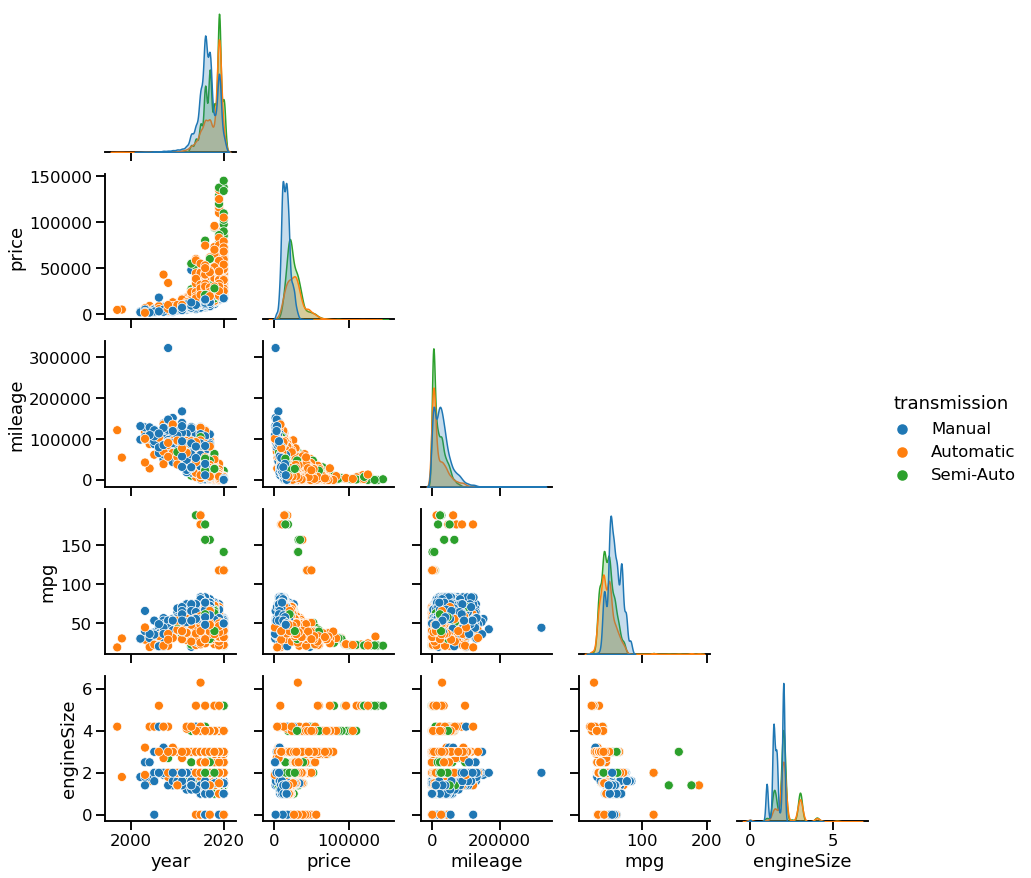

In [17]:
sns.pairplot(df, corner=True)
sns.pairplot(df, corner=True, hue="transmission")